In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

In [11]:
# 读取数据
df = pd.read_table('blood.txt')
df.head(10)

,Recency(months),Frequency(times),Monetary(c.c.blood),Time(months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
5,4,4,1000,4
6,2,7,1750,14
7,1,12,3000,35
8,2,9,2250,22
9,5,46,11500,98


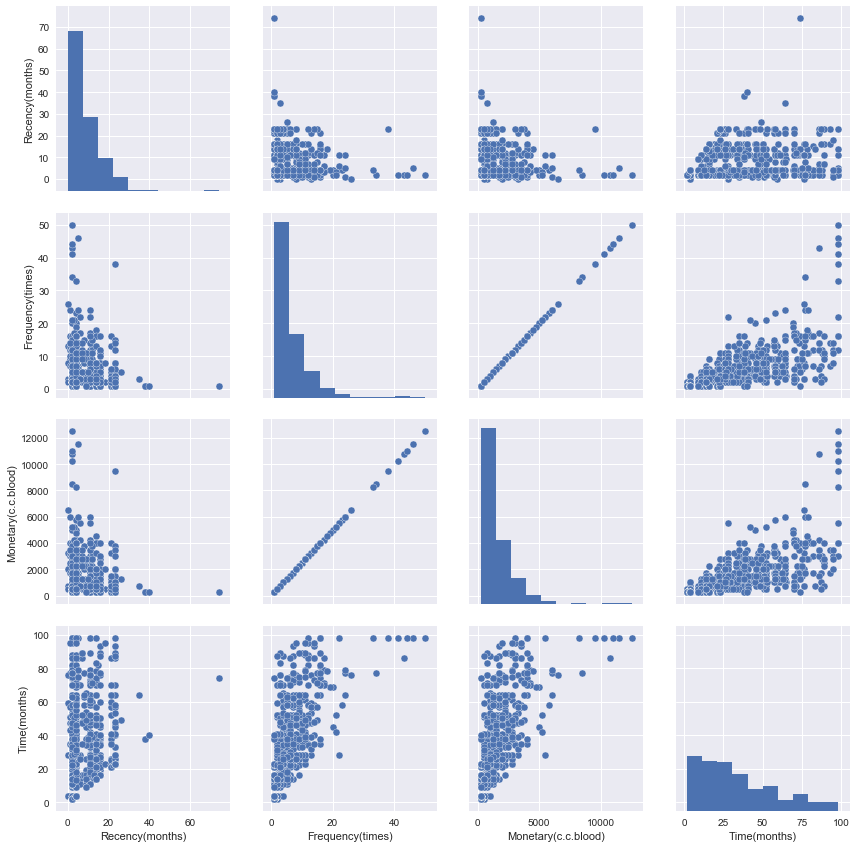

In [12]:
sns.set()
cols = ['Recency(months)', 'Frequency(times)', 'Monetary(c.c.blood)','Time(months)']
sns.pairplot(df[cols], size = 3)
plt.show();

In [79]:
# coding:utf-8
from numpy import *

# 加载数据函数
def loadDataSet(fileName):      
    dataMat = []               
    fr = open(fileName)
    for line in fr.readlines():
        curLine = line.strip().split('\t')
        fltLine = map(float,curLine) # 使用整数
        dataMat.append(fltLine)
    return dataMat  # 数据矩阵

# 距离计算
def distEclud(vecA, vecB):
    return sqrt(sum(power(vecA - vecB, 2)))

# 构建一个包含K个初始随机质心的集合
def randCent(dataSet, k):
    n = shape(dataSet)[1]
    centroids = mat(zeros((k,n))) 
    for j in range(n): 
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = mat(minJ + rangeJ * random.rand(k,1))
    return centroids

In [80]:
centroids = randCent(data,4)
centroids

matrix([[  7.17309170e+01,   3.46836237e+00,   1.15750179e+04,
           2.93669021e+01],
        [  6.17982379e+01,   2.54145415e+01,   7.45558392e+03,
           6.67974783e+01],
        [  4.98380544e+01,   3.33520380e+01,   1.22632542e+04,
           3.56853665e+01],
        [  4.69981664e+01,   8.14399827e+00,   1.07769508e+04,
           3.83000187e+01]])

In [81]:
# kMeans算法   
def kMeans(dataSet, k, distMeas=distEclud, createCent=randCent):

    m = shape(dataSet)[0] # 样本数量
    clusterAssment = mat(zeros((m,2)))  # m行2列,用来保存簇标记和误差
                                      
    centroids = createCent(dataSet, k)
    clusterChanged = True
    while clusterChanged:
        clusterChanged = False
        for i in range(m):
            minDist = inf
            minIndex = -1
            for j in range(k):
                distJI = distMeas(centroids[j,:],dataSet[i,:])
                if distJI < minDist:
                    minDist = distJI
                    minIndex = j
            if clusterAssment[i,0] != minIndex: 
                clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        # print centroids
        for cent in range(k): # 重新计算新的质心
            ptsInClust = dataSet[nonzero(clusterAssment[:,0].A==cent)[0]]
            centroids[cent,:] = mean(ptsInClust, axis=0)  
    return centroids, clusterAssment # 每次迭代质心的变化，每个簇分配结果矩阵

In [82]:
if __name__ == '__main__':
    datMat = mat(loadDataSet('hua.txt'))
    myCentroids, clusterAssing = kMeans(datMat,2)

### 数据集

In [83]:
datMat

matrix([[ 5.1,  3.5,  1.4,  0.2],
        [ 4.9,  3. ,  1.4,  0.2],
        [ 4.7,  3.2,  1.3,  0.2],
        [ 4.6,  3.1,  1.5,  0.2],
        [ 5. ,  3.6,  1.4,  0.2],
        [ 5.4,  3.9,  1.7,  0.4],
        [ 4.6,  3.4,  1.4,  0.3],
        [ 5. ,  3.4,  1.5,  0.2],
        [ 4.4,  2.9,  1.4,  0.2],
        [ 4.9,  3.1,  1.5,  0.1],
        [ 5.4,  3.7,  1.5,  0.2],
        [ 4.8,  3.4,  1.6,  0.2],
        [ 4.8,  3. ,  1.4,  0.1],
        [ 4.3,  3. ,  1.1,  0.1],
        [ 5.8,  4. ,  1.2,  0.2],
        [ 5.7,  4.4,  1.5,  0.4],
        [ 5.4,  3.9,  1.3,  0.4],
        [ 5.1,  3.5,  1.4,  0.3],
        [ 5.7,  3.8,  1.7,  0.3],
        [ 5.1,  3.8,  1.5,  0.3],
        [ 5.4,  3.4,  1.7,  0.2],
        [ 5.1,  3.7,  1.5,  0.4],
        [ 4.6,  3.6,  1. ,  0.2],
        [ 5.1,  3.3,  1.7,  0.5],
        [ 4.8,  3.4,  1.9,  0.2],
        [ 5. ,  3. ,  1.6,  0.2],
        [ 5. ,  3.4,  1.6,  0.4],
        [ 5.2,  3.5,  1.5,  0.2],
        [ 5.2,  3.4,  1.4,  0.2],
        [ 4.7,

### 质心

In [84]:
myCentroids

matrix([[ 6.30103093,  2.88659794,  4.95876289,  1.69587629],
        [ 5.00566038,  3.36981132,  1.56037736,  0.29056604]])

### 聚类结果

In [85]:
array = mat(clusterAssing)
array

matrix([[ 1.        ,  0.05977216],
        [ 1.        ,  0.18184763],
        [ 1.        ,  0.19826273],
        [ 1.        ,  0.24920612],
        [ 1.        ,  0.08694197],
        [ 1.        ,  0.46807405],
        [ 1.        ,  0.19128159],
        [ 1.        ,  0.01279103],
        [ 1.        ,  0.62147027],
        [ 1.        ,  0.1239231 ],
        [ 1.        ,  0.27637593],
        [ 1.        ,  0.05297971],
        [ 1.        ,  0.24109292],
        [ 1.        ,  0.88297971],
        [ 1.        ,  1.16618726],
        [ 1.        ,  1.55901744],
        [ 1.        ,  0.51637593],
        [ 1.        ,  0.05165895],
        [ 1.        ,  0.68675329],
        [ 1.        ,  0.19769669],
        [ 1.        ,  0.18411178],
        [ 1.        ,  0.13354575],
        [ 1.        ,  0.53977216],
        [ 1.        ,  0.07713065],
        [ 1.        ,  0.16675329],
        [ 1.        ,  0.14656461],
        [ 1.        ,  0.01448914],
        [ 1.        ,  0.066

### 误差平方和

In [88]:
SSE = array[:,1].sum()
SSE

152.34795176035794